### Loading libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

### Importing Dataframe

In [4]:
nyc_df = pd.read_csv("/Users/Jafar/Downloads/cis 490/HomeWork/Large_NYC_Visualization_Dataset.csv")
nyc_df.sample(5)

,Date,Average_Temperature,Total_Sales_Thousands,Population_Thousands,Neighborhood,House_Prices_Median,Unemployment_Rate,Event
4439,2/26/35,66.9,381.05,1605,Brooklyn,1460065,7.39,Sporting Event
730,12/31/24,52.5,152.08,5595,Brooklyn,316385,6.00,Parade
1804,12/10/27,59.9,311.43,6101,Brooklyn,658100,9.37,Protest
4215,7/17/34,82.9,188.72,7045,Manhattan,1121619,5.51,Sporting Event
2399,7/27/29,66.3,304.48,4185,Staten Island,1330547,5.19,Concert


### Exploratory analysis

In [7]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5000 non-null   object 
 1   Average_Temperature    5000 non-null   float64
 2   Total_Sales_Thousands  5000 non-null   float64
 3   Population_Thousands   5000 non-null   int64  
 4   Neighborhood           5000 non-null   object 
 5   House_Prices_Median    5000 non-null   int64  
 6   Unemployment_Rate      5000 non-null   float64
 7   Event                  5000 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 312.6+ KB


In [8]:
nyc_df.isnull().sum()

Date                     0
Average_Temperature      0
Total_Sales_Thousands    0
Population_Thousands     0
Neighborhood             0
House_Prices_Median      0
Unemployment_Rate        0
Event                    0
dtype: int64

In [29]:
nyc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,5000.0,2029.352200,3.954957,2023.00,2026.0000,2029.000,2033.000,2036.00
Average_Temperature,5000.0,62.322540,18.800555,30.00,46.0000,62.500,78.600,95.00
Total_Sales_Thousands,5000.0,516.913730,272.026305,50.05,284.2475,511.215,749.125,999.53
Population_Thousands,5000.0,5027.412000,2330.969301,1000.00,2965.0000,5025.500,7059.000,8998.00
House_Prices_Median,5000.0,899304.494000,347169.408696,300056.00,596179.2500,902943.000,1197781.250,1499968.00
Unemployment_Rate,5000.0,6.295908,2.157608,2.50,4.4300,6.330,8.130,10.00


In [16]:
# Converting Date into date type
nyc_df["Date"] = pd.to_datetime(nyc_df["Date"])
nyc_df["Date"] = nyc_df["Date"].dt.year
nyc_df["Date"].dtypes

dtype('int64')

### Visualizations

#### Box plot - Visualizing feature behaviour

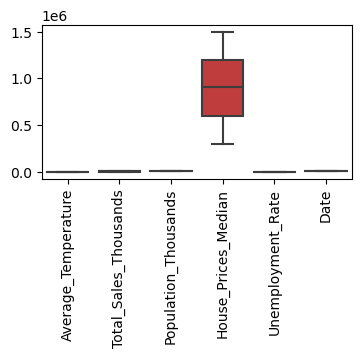

In [46]:
nyc_num = nyc_df[['Average_Temperature', 'Total_Sales_Thousands', 'Population_Thousands', 'House_Prices_Median', 'Unemployment_Rate', 'Date']]

plt.figure(figsize = (4, 2))
sns.boxplot(data=nyc_num)
plt.xticks(rotation = 90)
plt.show()

Comment: The scale of House_Prices_Median is very large. Normilization should be applied when creating a model.

#### Line plot - Visualizing unemployment mean rate per year

In [17]:
Unemployment_by_year = nyc_df.groupby("Date").agg(unemployment_mean_rate = pd.NamedAgg("Unemployment_Rate", "mean")).sort_values("Date", ascending = True).reset_index()
Unemployment_by_year

,Date,unemployment_mean_rate
0,2023,6.197890
1,2024,6.265273
2,2025,6.459644
3,2026,6.369260
4,2027,6.536849
5,2028,6.304235
6,2029,6.320137
7,2030,6.304082
8,2031,6.177507
9,2032,6.300027


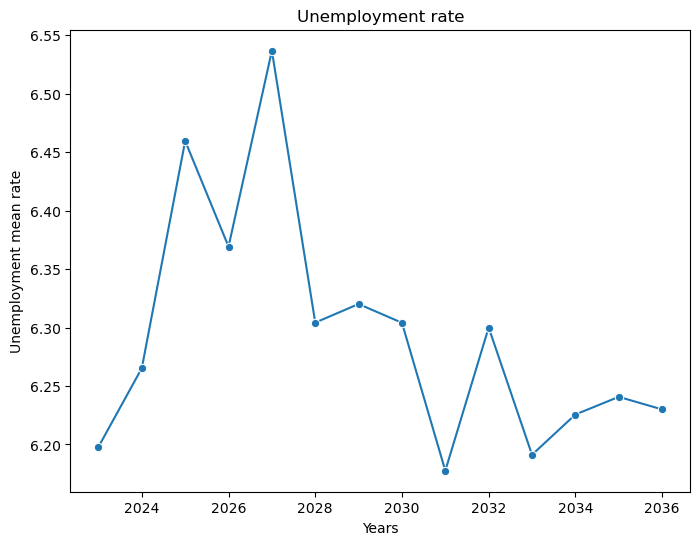

In [27]:
plt.figure(figsize = (8, 6))
sns.lineplot(x = 'Date', y = 'unemployment_mean_rate', data = Unemployment_by_year, marker = "o")
plt.xlabel("Years")
plt.ylabel("Unemployment mean rate")
plt.title("Unemployment rate")
plt.show()

Comment: The unemployment rate is predicted to peak in 2027 and then gradually drop in subsequent years. The lowest unemployment rates are predicted to occur in 2031.

#### Bar plot - Visualizing housing prices per County

In [21]:
Neighborhood_houseprice = nyc_df.groupby("Neighborhood").agg(House_price = pd.NamedAgg("House_Prices_Median", "mean")).sort_values("House_price", ascending = True).reset_index()
Neighborhood_houseprice

,Neighborhood,House_price
0,Bronx,884626.536810
1,Brooklyn,886257.827916
2,Queens,890181.260513
3,Manhattan,915965.755319
4,Staten Island,919644.993795


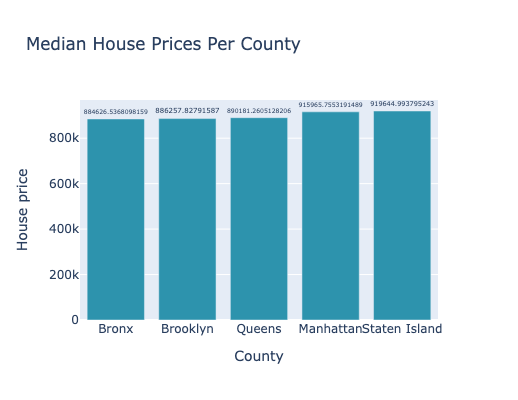

In [26]:
bar_plot = go.Bar(
    x = Neighborhood_houseprice["Neighborhood"], 
    y = Neighborhood_houseprice["House_price"],
    marker = dict(color = "#2D93AD"),
    text = Neighborhood_houseprice["House_price"],
    textposition = "outside"
)

layout = go.Layout(
    title = "Median House Prices Per County",
    xaxis_title = "County", 
    yaxis_title = "House price",
    height = 400,
    width = 600
)

bar_fig = go.Figure(data = [bar_plot], layout = layout)
bar_fig.show()

Comment: Though Staten Island has the highest median house price, there isn’t a drastic variation in prices, which might suggest relatively similar market conditions across these counties.